In [1]:
#Import dependencies
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('income.txt')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


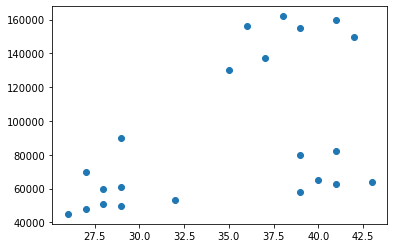

In [3]:
plt.scatter(df.Age, df['Income($)'])

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [6]:
df['Cluster'] = y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


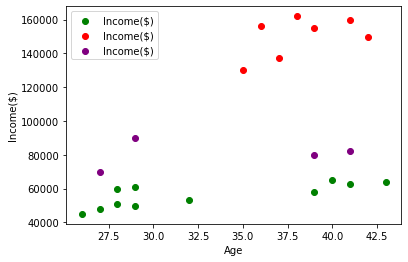

In [7]:
df0 = df[df.Cluster==0]
df1 = df[df.Cluster==1]
df2 = df[df.Cluster==2]

plt.scatter(df0.Age, df0['Income($)'], color='green', label ='Income($)')
plt.scatter(df1.Age, df1['Income($)'], color='red', label = 'Income($)')
plt.scatter(df2.Age, df2['Income($)'], color='purple', label= 'Income($)')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [8]:
scaler = MinMaxScaler()

In [9]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

In [10]:
scaler.fit(df[['Age']])
df['Age']= scaler.transform(df[['Age']])

In [11]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [12]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [13]:
df['Cluster'] = y_pred
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [14]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

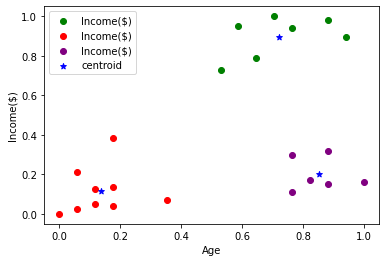

In [15]:
df0 = df[df.Cluster==0]
df1 = df[df.Cluster==1]
df2 = df[df.Cluster==2]

plt.scatter(df0.Age, df0['Income($)'], color='green', label = 'Income($)')
plt.scatter(df1.Age, df1['Income($)'], color='red', label = 'Income($)')
plt.scatter(df2.Age, df2['Income($)'], color='purple', label = 'Income($)')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='blue', marker='*', label = 'centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [16]:
km_rng = range(1, 10)
sse = []

for k in km_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [17]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.21055478995472496,
 0.1685851223602976,
 0.13265419827245162,
 0.10188787724979426]

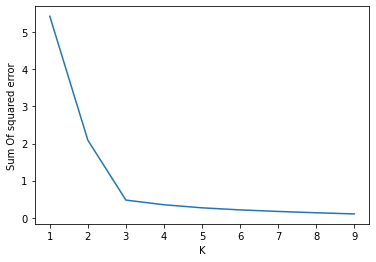

In [18]:
plt.xlabel('K')
plt.ylabel('Sum Of squared error')
plt.plot(km_rng, sse)